### Datos de Api: LOOPNET

Se hace el llamado a una Api de Bienes Raices, para poder obtener los negocios en venta en Nyeva Jersey, y poder conseguir un estimado del valor de los locales

In [2]:
import requests
import pandas as pd

url = "https://loopnet-api.p.rapidapi.com/loopnet/business/advanceSearch"

payload = {
    "categories": ["Food & Related products"],
    "askingPriceMin": None,
    "askingPriceMax": None,
    "cashFlowMin": None,
    "cashFlowMax": None,
    "grossRevenueMin": None,
    "grossRevenueMax": None,
    "establishedAfterYear": None,
    "daysListedAgo": None,
    "page": 1,
    "hideListingsWithoutAskingPrice": None,
    "onlyShowListingsWithSellerFinancing": None,
    "onlyShowBusinessesWithRealEstate": None,
    "onlyShowRelocatableListings": None,
    "hideFranchiseOpportunities": None,
    "keyword": None,
    "locations": [
        {
            "geoType": 20,
            "regionId": "32",
            "countryCode": "US",
            "countryId": "US",
            "stateCode": "NJ",
            "cityId": 97,
            "metroAreaId": 0,
            "regionName": "New Jersey",
            "regionNameSeo": "new-jersey",
            "displayName": "New Jersey, NJ",
            "locationDetected": False
        }
    ]
}
headers = {
    "x-rapidapi-key": "7c348c234fmsha7a75fdeaf9a5fdp10e68fjsne66417e365c7",
    "x-rapidapi-host": "loopnet-api.p.rapidapi.com",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

# Extraer los datos del JSON de la respuesta
data = response.json()['data']

# Convertir los datos en un DataFrame
df = pd.DataFrame(data)

# Ver el DataFrame
df


,listNumber,absenteeOwner,account,addressConfidential,adLevelId,adLine,askingPrice,askingPricePerSquareFoot,bizQuestPrimaryCategoryId,bizQuestPrimarySubcategoryId,...,visibilityStatusChangedDate,websiteConfidential,yearEstablished,yearOfConstruction,zip,urlStub,locationDetail,locationDetailCrumbs,searchOffset,auctionDetail
0,2326665,False,1593.0,True,4,Seafood Market for Sale in New Jersey,750000.0,None,10,222,...,None,False,2011.0,None,None,/Business-Opportunity/seafood-market-for-sale-...,"Burlington County, NJ",None,0,None
1,2313707,False,NaN,True,1,philly pretzel factory,150000.0,None,10,221,...,None,False,2020.0,None,08012,/Business-Opportunity/productive-family-busine...,"Washington Township, NJ",None,1,None
2,2292232,False,1179.0,True,4,Manufacturing Distribution Business For Sale,2100000.0,None,10,221,...,None,False,1925.0,None,None,/Business-Opportunity/candy-manufacturing-dist...,New Jersey,None,2,None
3,2309376,False,NaN,False,1,"PET Bottle Blowing Machine, 3 Cavities, chille...",135000.0,None,10,221,...,None,False,2019.0,None,07011,/Business-Asset/pet-bottle-blowing-machine-3-c...,"Clifton, NJ",None,3,None
4,2258919,False,1976.0,True,4,GREAT START UP BUSINESS needs SOCIAL MEDIA EXP...,25000.0,None,10,221,...,None,False,2020.0,None,08034,/Business-Asset/asset-sale-creative-internet-s...,"Cherry Hill, NJ",None,4,None
5,2329114,False,45742.0,False,3,None,350000.0,None,10,224,...,None,False,NaN,None,08753,/Business-Opportunity/be-your-own-boss-incredi...,"Toms River, NJ",None,5,None
6,2320695,False,48404.0,True,3,None,127599.0,None,10,221,...,2025-01-14T15:48:18,True,1988.0,None,07030,/Business-Opportunity/flexible-vending-busines...,"Hoboken, NJ",None,6,None
7,2320389,False,49624.0,True,3,None,400000.0,None,10,221,...,2025-01-14T13:21:41,False,2005.0,None,07109,/Business-Opportunity/italian-frozen-foods-bus...,"Belleville, NJ",None,7,None
8,2311769,False,1593.0,True,3,None,1100000.0,None,18,269,...,None,False,1930.0,None,None,/Business-Opportunity/niche-manufacturer-for-s...,"Bergen County, NJ",None,8,None
9,2297199,False,388.0,True,3,None,300000.0,None,19,277,...,None,False,NaN,None,None,/Business-Opportunity/profitable-bread-route-f...,"Somerset County, NJ",None,9,None


#### Limpieza de datos

Se procede a eliminar las columnas que no nos sirven, para poder tener datos más limpios.
Dejando:

    heading: Titulo de la publicacion

    askingPrice: Precio de la venta

    buildingSquareFeet: 

    streetAddress: Direccion del local

    locationDetail: Nos da la indormacion del Estado, y en algunos casos tambien la ciudad

    


In [3]:
df_limpio = df[["listNumber","heading", "askingPrice", "buildingSquareFeet", "streetAddress", "locationDetail"]]

In [4]:
df_limpio

,listNumber,heading,askingPrice,buildingSquareFeet,streetAddress,locationDetail
0,2326665,Seafood Market for Sale in New Jersey,750000.0,NaN,None,"Burlington County, NJ"
1,2313707,productive family business,150000.0,NaN,None,"Washington Township, NJ"
2,2292232,"Candy Manufacturing, Distribution and Retail B...",2100000.0,NaN,None,New Jersey
3,2309376,"PET Bottle Blowing Machine, 3 Cavities, chille...",135000.0,NaN,791 Paulison Ave,"Clifton, NJ"
4,2258919,Asset Sale - Creative Internet Sales Of Unique...,25000.0,NaN,None,"Cherry Hill, NJ"
5,2329114,Be your own boss Incredible opportunity to own...,350000.0,NaN,"1611 Rt 37 E. Tom's River, NJ 08753","Toms River, NJ"
6,2320695,Flexible Vending Business with Advanced Techno...,127599.0,NaN,None,"Hoboken, NJ"
7,2320389,Italian Frozen Foods Business for Sale,400000.0,3900.0,None,"Belleville, NJ"
8,2311769,Niche Manufacturer for Sale in NJ,1100000.0,NaN,None,"Bergen County, NJ"
9,2297199,Profitable Bread Route For Sale,300000.0,NaN,None,"Somerset County, NJ"


In [5]:
df_limpio = df_limpio.dropna(subset=["askingPrice"])

In [6]:
df_limpio

,listNumber,heading,askingPrice,buildingSquareFeet,streetAddress,locationDetail
0,2326665,Seafood Market for Sale in New Jersey,750000.0,NaN,None,"Burlington County, NJ"
1,2313707,productive family business,150000.0,NaN,None,"Washington Township, NJ"
2,2292232,"Candy Manufacturing, Distribution and Retail B...",2100000.0,NaN,None,New Jersey
3,2309376,"PET Bottle Blowing Machine, 3 Cavities, chille...",135000.0,NaN,791 Paulison Ave,"Clifton, NJ"
4,2258919,Asset Sale - Creative Internet Sales Of Unique...,25000.0,NaN,None,"Cherry Hill, NJ"
5,2329114,Be your own boss Incredible opportunity to own...,350000.0,NaN,"1611 Rt 37 E. Tom's River, NJ 08753","Toms River, NJ"
6,2320695,Flexible Vending Business with Advanced Techno...,127599.0,NaN,None,"Hoboken, NJ"
7,2320389,Italian Frozen Foods Business for Sale,400000.0,3900.0,None,"Belleville, NJ"
8,2311769,Niche Manufacturer for Sale in NJ,1100000.0,NaN,None,"Bergen County, NJ"
9,2297199,Profitable Bread Route For Sale,300000.0,NaN,None,"Somerset County, NJ"


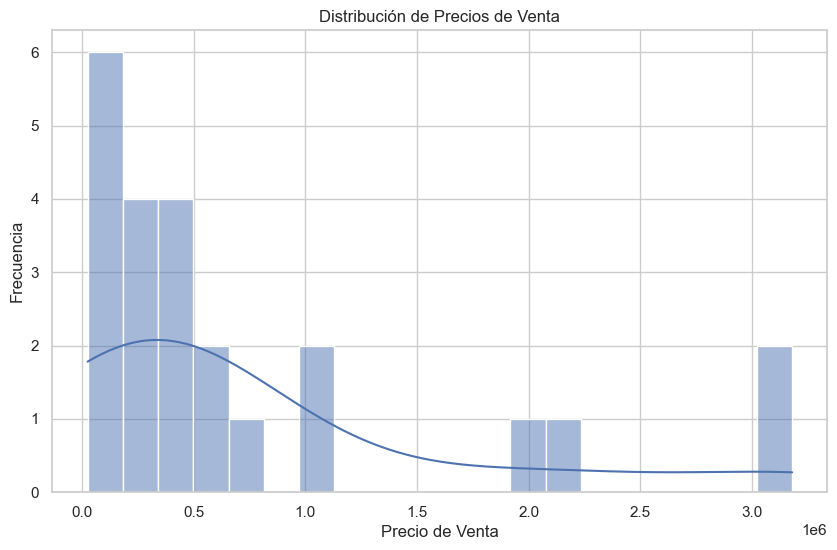

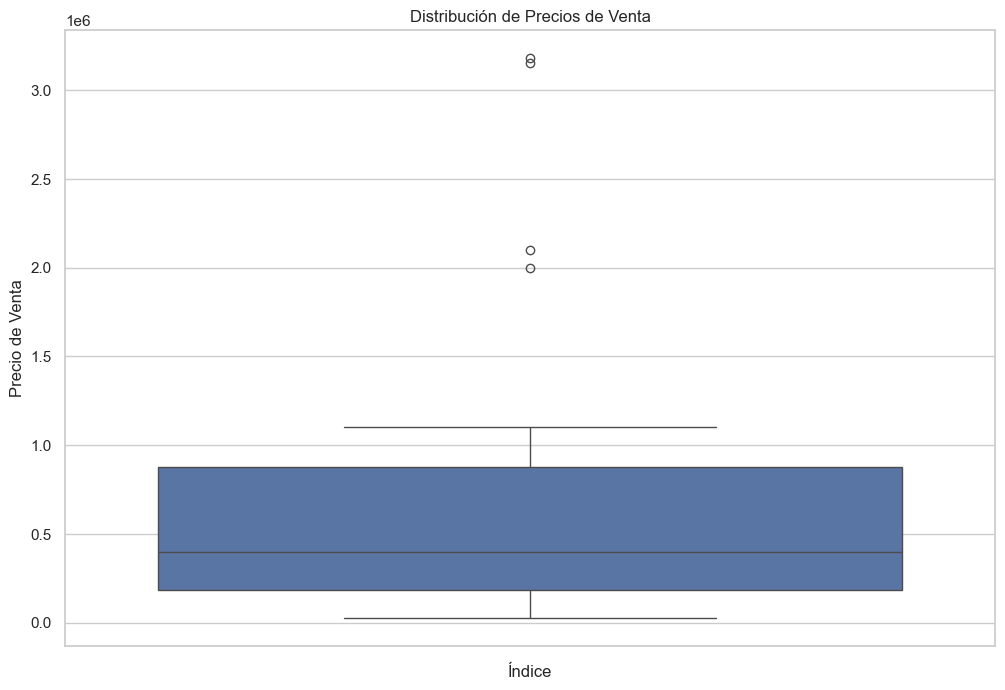

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Histograma de precios de venta
plt.figure(figsize=(10, 6))
sns.histplot(df_limpio['askingPrice'], kde=True, bins=20)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de precios de venta
plt.figure(figsize=(12, 8))
sns.boxplot(y='askingPrice', data=df_limpio)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Índice')
plt.ylabel('Precio de Venta')
plt.show()

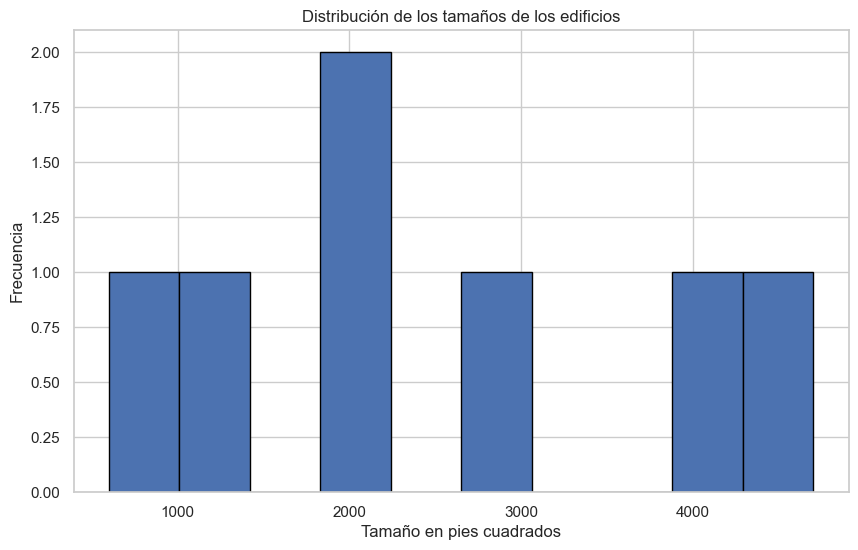

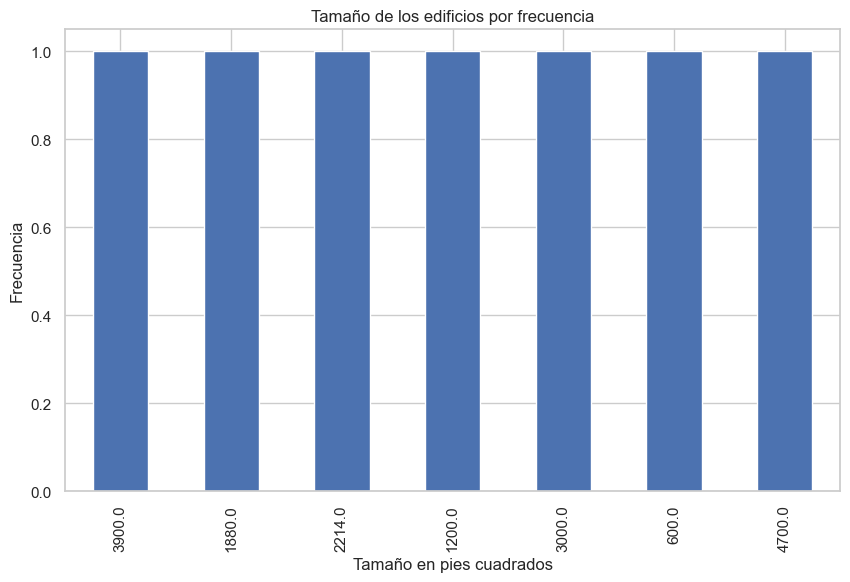

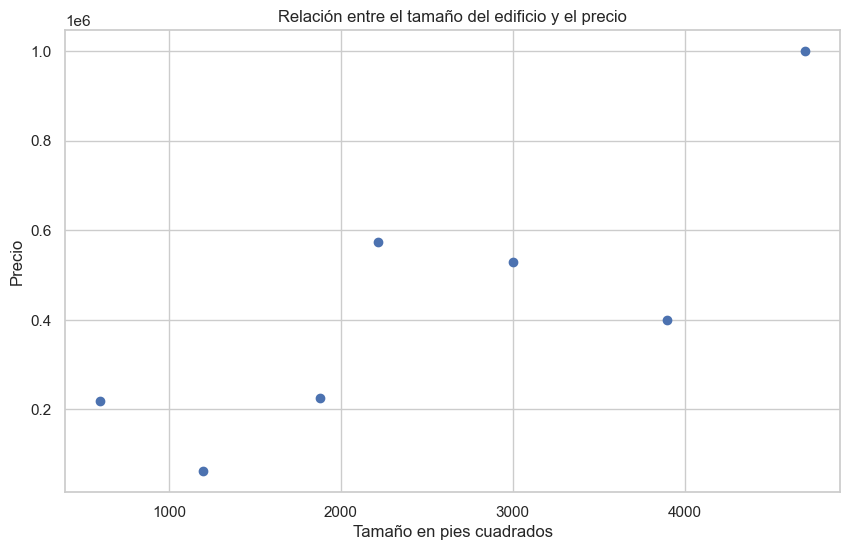

In [8]:
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(df['buildingSquareFeet'], bins=10, edgecolor='black')
plt.title('Distribución de los tamaños de los edificios')
plt.xlabel('Tamaño en pies cuadrados')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 6))
df['buildingSquareFeet'].value_counts().plot(kind='bar')
plt.title('Tamaño de los edificios por frecuencia')
plt.xlabel('Tamaño en pies cuadrados')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['buildingSquareFeet'], df['askingPrice'])
plt.title('Relación entre el tamaño del edificio y el precio')
plt.xlabel('Tamaño en pies cuadrados')
plt.ylabel('Precio')
plt.show()


### Conclusiones del Análisis Exploratorio de Datos (EDA)

#### Distribución de Precios de Venta
1. **Histograma de Precios de Venta**:
    - El histograma muestra la distribución de los precios de venta de los negocios en Nueva Jersey.
    - La mayoría de los precios de venta se concentran en el rango de 0 a 1,000,000 USD.
    - Hay una cola larga hacia la derecha, indicando que hay algunos negocios con precios de venta significativamente más altos.
    - La curva de densidad (KDE) sugiere que la distribución no es normal y está sesgada hacia la derecha.

2. **Boxplot de Precios de Venta**:
    - El boxplot proporciona una visión clara de la dispersión y los valores atípicos en los precios de venta.
    - La mediana del precio de venta está alrededor de 400,000 USD.
    - Hay varios valores atípicos por encima de 1,000,000 USD, lo que confirma la presencia de negocios con precios de venta muy altos.

#### Distribución de los Tamaños de los Edificios
3. **Histograma de Tamaños de los Edificios**:
    - El histograma muestra la distribución de los tamaños de los edificios en pies cuadrados.
    - La mayoría de los edificios tienen tamaños menores a 10,000 pies cuadrados.
    - Hay una concentración notable de edificios en el rango de 0 a 5,000 pies cuadrados.

4. **Gráfico de Barras de Tamaños de los Edificios**:
    - El gráfico de barras muestra la frecuencia de los diferentes tamaños de edificios.
    - Los tamaños más comunes son aquellos menores a 5,000 pies cuadrados, lo que sugiere que la mayoría de los negocios en venta son de tamaño pequeño a mediano.

#### Relación entre el Tamaño del Edificio y el Precio de Venta
5. **Gráfico de Dispersión**:
    - El gráfico de dispersión muestra la relación entre el tamaño del edificio y el precio de venta.
    - No se observa una correlación clara entre el tamaño del edificio y el precio de venta.
    - Algunos edificios pequeños tienen precios de venta altos, mientras que algunos edificios grandes tienen precios de venta relativamente bajos.
    - Esto sugiere que otros factores, además del tamaño del edificio, influyen en el precio de venta de los negocios.

### Conclusión General
- La mayoría de los negocios en venta en Nueva Jersey tienen precios de venta que se concentran en el rango de 0 a 1,000,000 USD, con algunos valores atípicos significativamente más altos.
- Los tamaños de los edificios varían, pero la mayoría son menores a 10,000 pies cuadrados.
- No hay una correlación clara entre el tamaño del edificio y el precio de venta, lo que indica que otros factores, como la ubicación, el tipo de negocio y las condiciones del mercado, pueden tener un impacto significativo en el precio de venta.

